In [1]:
import pandas as pd
import pandas.util.testing as tm

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

import datetime as dt 
from datetime import timedelta 

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-e7b1650bcb4d>:2: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\dibya\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
train = pd.read_csv("RetailChain_Train.csv")
test = pd.read_csv("RetailChain_Test.csv")

In [3]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [4]:
train.shape

(150150, 9)

In [5]:
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [6]:
test.shape

(13860, 8)

# Data Cleaning

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [8]:
train.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [9]:
train['week'].unique()

array(['17/01/11', '24/01/11', '31/01/11', '07/02/11', '14/02/11',
       '21/02/11', '28/02/11', '07/03/11', '14/03/11', '21/03/11',
       '28/03/11', '04/04/11', '11/04/11', '18/04/11', '25/04/11',
       '02/05/11', '09/05/11', '16/05/11', '23/05/11', '30/05/11',
       '06/06/11', '13/06/11', '20/06/11', '27/06/11', '04/07/11',
       '11/07/11', '18/07/11', '25/07/11', '01/08/11', '08/08/11',
       '15/08/11', '22/08/11', '29/08/11', '05/09/11', '12/09/11',
       '19/09/11', '26/09/11', '03/10/11', '10/10/11', '17/10/11',
       '24/10/11', '31/10/11', '07/11/11', '14/11/11', '21/11/11',
       '28/11/11', '05/12/11', '12/12/11', '19/12/11', '26/12/11',
       '02/01/12', '09/01/12', '16/01/12', '23/01/12', '30/01/12',
       '06/02/12', '13/02/12', '20/02/12', '27/02/12', '06/03/12',
       '13/03/12', '20/03/12', '27/03/12', '03/04/12', '10/04/12',
       '17/04/12', '24/04/12', '01/05/12', '08/05/12', '15/05/12',
       '22/05/12', '29/05/12', '05/06/12', '12/06/12', '19/06/

In [10]:
train1 = train.copy()

In [11]:
train1['week'] = pd.to_datetime(train1['week'])
train1['week']

0        2011-01-17
1        2011-01-17
2        2011-01-17
3        2011-01-17
4        2011-01-17
            ...    
150145   2013-09-07
150146   2013-09-07
150147   2013-09-07
150148   2013-09-07
150149   2013-09-07
Name: week, Length: 150150, dtype: datetime64[ns]

In [12]:
train1['year'] = train1['week'].dt.year
train1['year'].unique()

array([2011, 2012, 2013], dtype=int64)

In [13]:
train1['month'] = train1['week'].dt.month
train1['month'].unique()

array([ 1,  7,  2,  3,  4, 11,  9,  5,  6,  8, 12, 10], dtype=int64)

In [14]:
train1['day'] = train1['week'].dt.day
train1['day'].unique()

array([17, 24, 31,  2, 14, 21, 28,  3,  4, 18, 25,  5, 16, 23, 30,  6, 13,
       20, 27,  7,  8, 15, 22, 29,  9, 19, 26, 10, 11, 12,  1],
      dtype=int64)

In [15]:
train1['week_of_year'] = train1['week'].dt.weekofyear
train1['week_of_year'].unique()

array([ 3,  4,  5, 26,  7,  8,  9, 11, 12, 13, 14, 44, 16, 17, 36, 20, 21,
       22, 23, 24, 25, 45, 29, 30,  1, 32, 33, 34, 35, 19, 49, 38, 39, 10,
       41, 42, 43, 28, 46, 47, 48, 50, 51, 52, 40, 31, 18, 27, 15,  6, 37],
      dtype=int64)

In [16]:
train1['day_of_week'] = train1['week'].dt.dayofweek
train1['day_of_week'].unique()

array([0, 5, 6, 4, 3, 2, 1], dtype=int64)

In [17]:
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_ID        13860 non-null  int64  
 1   week             13860 non-null  object 
 2   store_id         13860 non-null  int64  
 3   sku_id           13860 non-null  int64  
 4   total_price      13860 non-null  float64
 5   base_price       13860 non-null  float64
 6   is_featured_sku  13860 non-null  int64  
 7   is_display_sku   13860 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 866.4+ KB


In [19]:
test.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

In [20]:
test1 = test.copy()

In [21]:
test1['week'] = pd.to_datetime(test1['week'])
test1['week']

0       2013-07-16
1       2013-07-16
2       2013-07-16
3       2013-07-16
4       2013-07-16
           ...    
13855   2013-01-10
13856   2013-01-10
13857   2013-01-10
13858   2013-01-10
13859   2013-01-10
Name: week, Length: 13860, dtype: datetime64[ns]

In [22]:
test1['year'] = test1['week'].dt.year
test1['year'].unique()

array([2013], dtype=int64)

In [23]:
test1['month'] = test1['week'].dt.month
test1['month'].unique()

array([ 7,  6,  8,  3, 10,  9,  1], dtype=int64)

In [24]:
test1['day'] = test1['week'].dt.day
test1['day'].unique()

array([16, 23, 30,  8, 13, 20, 27,  9, 17, 24, 10], dtype=int64)

In [25]:
test1['week_of_year'] = test1['week'].dt.weekofyear
test1['week_of_year'].unique()

array([29, 30, 31, 23, 33, 34, 35, 10, 41, 38, 39,  2], dtype=int64)

In [26]:
test1['day_of_week'] = test1['week'].dt.dayofweek
test1['day_of_week'].unique()

array([1, 5, 2, 3], dtype=int64)

# Feature Engineering

In [27]:
train1.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
year               0
month              0
day                0
week_of_year       0
day_of_week        0
dtype: int64

Only 1 missing value is present in the column 'total_price'.  So, we can replace the missing value with median

In [28]:
train1['total_price'].median()

198.075

In [29]:
train1['total_price'] = train1['total_price'].fillna(train1['total_price'].median())

In [30]:
train1.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day,week_of_year,day_of_week
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20,2011,1,17,3,0
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28,2011,1,17,3,0
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19,2011,1,17,3,0
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44,2011,1,17,3,0
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52,2011,1,17,3,0


In [31]:
train2 = train1.drop(['week'], axis = 1)
train2.head()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day,week_of_year,day_of_week
0,1,8091,216418,99.0375,111.8625,0,0,20,2011,1,17,3,0
1,2,8091,216419,99.0375,99.0375,0,0,28,2011,1,17,3,0
2,3,8091,216425,133.9500,133.9500,0,0,19,2011,1,17,3,0
3,4,8091,216233,133.9500,133.9500,0,0,44,2011,1,17,3,0
4,5,8091,217390,141.0750,141.0750,0,0,52,2011,1,17,3,0


In [32]:
train2 = train2.drop(['record_ID'], axis = 1)
train2.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day,week_of_year,day_of_week
0,8091,216418,99.0375,111.8625,0,0,20,2011,1,17,3,0
1,8091,216419,99.0375,99.0375,0,0,28,2011,1,17,3,0
2,8091,216425,133.9500,133.9500,0,0,19,2011,1,17,3,0
3,8091,216233,133.9500,133.9500,0,0,44,2011,1,17,3,0
4,8091,217390,141.0750,141.0750,0,0,52,2011,1,17,3,0


In [33]:
train2.dtypes

store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
units_sold           int64
year                 int64
month                int64
day                  int64
week_of_year         int64
day_of_week          int64
dtype: object

In [34]:
test2 = test1.drop(['week'], axis = 1)

In [35]:
test2 = test2.drop(['record_ID'], axis = 1)

In [36]:
test2.dtypes

store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
year                 int64
month                int64
day                  int64
week_of_year         int64
day_of_week          int64
dtype: object

In [37]:
train2['is_featured_sku'].unique()

array([0, 1], dtype=int64)

In [38]:
train2['is_display_sku'].unique()

array([0, 1], dtype=int64)

In [39]:
train2.describe()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day,week_of_year,day_of_week
count,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,9199.422511,254761.132468,206.626694,219.425927,0.095611,0.133200,51.674206,2011.830769,6.130769,15.700000,24.992308,1.400000
std,615.591445,85547.306447,103.308175,110.961712,0.294058,0.339792,60.207904,0.755887,3.438232,8.944861,14.867927,1.791439
min,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,1.000000,0.000000
25%,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000,2011.000000,3.000000,7.000000,12.000000,0.000000
50%,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000,2012.000000,6.000000,16.000000,23.500000,1.000000
75%,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000,2012.000000,9.000000,24.000000,38.000000,2.000000
max,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000,2013.000000,12.000000,31.000000,52.000000,6.000000


In [40]:
numerical_cols = train2.select_dtypes(include = ['int64', 'float64'])
numerical_cols 

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day,week_of_year,day_of_week
0,8091,216418,99.0375,111.8625,0,0,20,2011,1,17,3,0
1,8091,216419,99.0375,99.0375,0,0,28,2011,1,17,3,0
2,8091,216425,133.9500,133.9500,0,0,19,2011,1,17,3,0
3,8091,216233,133.9500,133.9500,0,0,44,2011,1,17,3,0
4,8091,217390,141.0750,141.0750,0,0,52,2011,1,17,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,2013,9,7,36,5
150146,9984,223153,235.8375,235.8375,0,0,30,2013,9,7,36,5
150147,9984,245338,357.6750,483.7875,1,1,31,2013,9,7,36,5
150148,9984,547934,141.7875,191.6625,0,1,12,2013,9,7,36,5


<AxesSubplot:xlabel='total_price', ylabel='Density'>

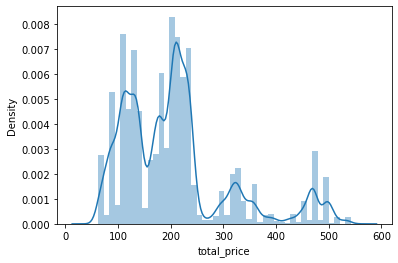

In [41]:
sns.distplot(numerical_cols['total_price'])

<AxesSubplot:xlabel='base_price', ylabel='Density'>

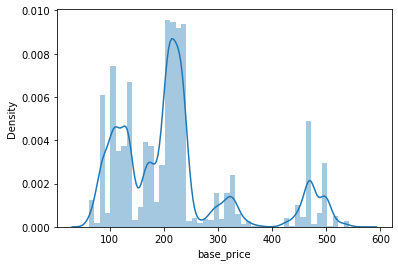

In [42]:
sns.distplot(numerical_cols['base_price'])

<AxesSubplot:xlabel='units_sold', ylabel='Density'>

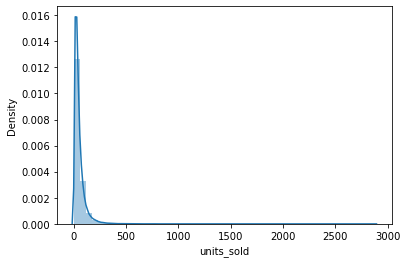

In [43]:
sns.distplot(numerical_cols['units_sold'])

<AxesSubplot:xlabel='total_price'>

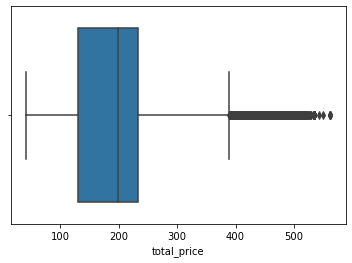

In [44]:
sns.boxplot(train2['total_price'])

<AxesSubplot:xlabel='base_price'>

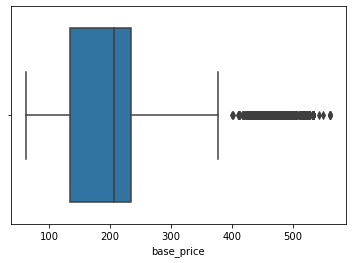

In [45]:
sns.boxplot(train2['base_price'])

<AxesSubplot:xlabel='units_sold'>

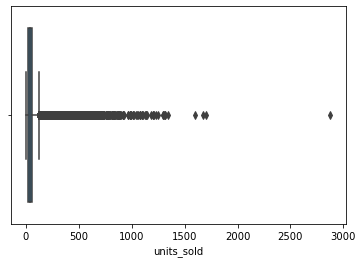

In [46]:
sns.boxplot(train2['units_sold'])

In [47]:
# univariate analysis on numerical columns

def univariate_num(data, num_cols):
 
  for i, j in enumerate(num_cols):
    mini = data[j].min()
    maxi = data[j].max()
    mean = data[j].mean()
    median = data[j].median()
    sd = data[j].std()
    skew = data[j].skew()
    kurt = data[j].kurtosis()
    upper_outlier = mean + sd 
    lower_outlier = mean - sd
    quant25 = data[j].quantile(0.25)
    quant75 = data[j].quantile(0.75)
    IQR = quant75 - quant25
    print(j, '\n')
    print('Minimum: ', mini)
    print('Maximum: ', maxi)
    print('Mean: ', mean)
    print('Median: ', median)
    print('SD: ', sd)
    print('Skewness: ', skew)
    print('Kurtosis: ', kurt)
    print('1st quartile: ', quant25)
    print('3rd quartile: ', quant75)
    print('Inter-quartile Range: ', IQR)
    print('Upper Outlier: ', upper_outlier)
    print('Lower Outlier: ', lower_outlier, '\n')

In [48]:
univariate_num(train2, ['total_price', 'base_price', 'units_sold'])

total_price 

Minimum:  41.325
Maximum:  562.1625
Mean:  206.6266940560864
Median:  198.075
SD:  103.30817474705154
Skewness:  1.2505705229331843
Kurtosis:  1.2382985982481007
1st quartile:  130.3875
3rd quartile:  233.7
Inter-quartile Range:  103.3125
Upper Outlier:  309.93486880313793
Lower Outlier:  103.31851930903485 

base_price 

Minimum:  61.275
Maximum:  562.1625
Mean:  219.4259273228659
Median:  205.9125
SD:  110.96171232936885
Skewness:  1.2089916001778014
Kurtosis:  0.8678374985354673
1st quartile:  133.2375
3rd quartile:  234.4125
Inter-quartile Range:  101.17499999999998
Upper Outlier:  330.3876396522347
Lower Outlier:  108.46421499349705 

units_sold 

Minimum:  1
Maximum:  2876
Mean:  51.6742057942058
Median:  35.0
SD:  60.20790385753384
Skewness:  6.114995824093101
Kurtosis:  93.68625251431351
1st quartile:  20.0
3rd quartile:  62.0
Inter-quartile Range:  42.0
Upper Outlier:  111.88210965173964
Lower Outlier:  -8.533698063328046 



In [49]:
units_sold_mean = train2['units_sold'].mean()
units_sold_st_dev = train2['units_sold'].std()
units_sold_upper_outlier = units_sold_mean + units_sold_st_dev
print(units_sold_upper_outlier)

111.88210965173964


In [50]:
train2.drop(train2[train2['units_sold'] > units_sold_upper_outlier].index, inplace = True)

<AxesSubplot:xlabel='units_sold', ylabel='Density'>

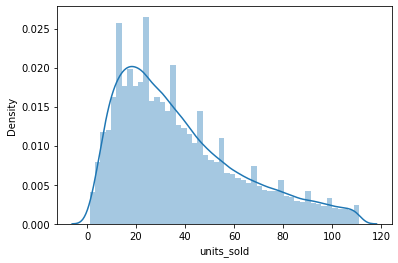

In [51]:
sns.distplot(train2['units_sold'])

In [52]:
train2['store_id'] = train2['store_id'].astype('category')
train2['sku_id'] = train2['sku_id'].astype('category')
train2['is_featured_sku'] = train2['is_featured_sku'].astype('category')
train2['is_display_sku'] = train2['is_display_sku'].astype('category')

<AxesSubplot:xlabel='is_featured_sku'>

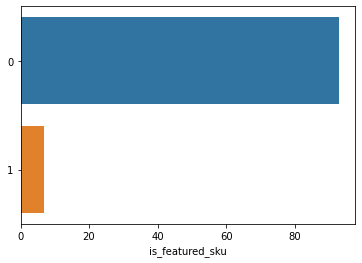

In [53]:
featured_sku_count = round(train2['is_featured_sku'].value_counts(normalize = True)*100, 2)
sns.barplot(featured_sku_count, featured_sku_count.index , order = featured_sku_count.index)

<AxesSubplot:xlabel='is_display_sku'>

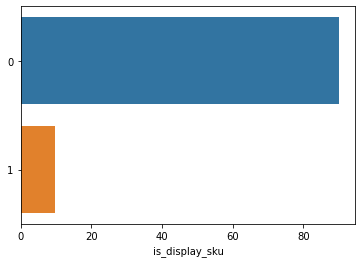

In [54]:
display_sku_count = round(train2['is_display_sku'].value_counts(normalize = True)*100, 2)
sns.barplot(display_sku_count, display_sku_count.index , order = display_sku_count.index)

In [55]:
train2.corr()

,total_price,base_price,units_sold,year,month,day,week_of_year,day_of_week
total_price,1.000000,0.966588,-0.273242,0.004502,0.001088,-0.001479,0.000885,0.007838
base_price,0.966588,1.000000,-0.214327,0.013691,0.004856,0.000062,0.004995,0.002795
units_sold,-0.273242,-0.214327,1.000000,-0.009076,0.024483,-0.004891,0.024500,-0.022381
year,0.004502,0.013691,-0.009076,1.000000,-0.153738,-0.124008,-0.157678,0.229564
month,0.001088,0.004856,0.024483,-0.153738,1.000000,-0.093448,0.995408,0.017875
day,-0.001479,0.000062,-0.004891,-0.124008,-0.093448,1.000000,0.000618,-0.573851
week_of_year,0.000885,0.004995,0.024500,-0.157678,0.995408,0.000618,1.000000,-0.046298
day_of_week,0.007838,0.002795,-0.022381,0.229564,0.017875,-0.573851,-0.046298,1.000000


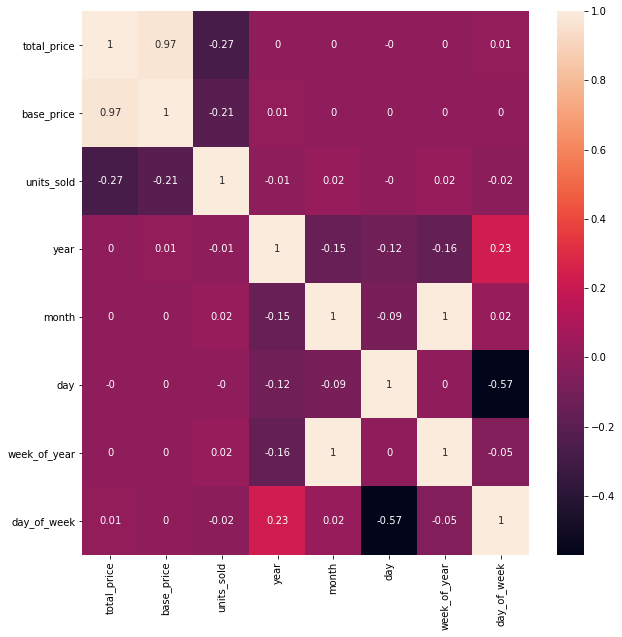

In [56]:
correlation = round(train2.corr(), 2)
plt.figure(figsize = (10, 10))
ax = sns.heatmap(correlation, annot = True)
plt.show()

In [57]:
train['store_id'] = train['store_id'].astype('int64')
train['sku_id'] = train['sku_id'].astype('int64')
train['is_display_sku'] = train['is_display_sku'].astype('int64')
train['is_featured_sku'] = train['is_featured_sku'].astype('int64')

# Building Linear Regression Model

In [58]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error as msle

In [59]:
train2['units_sold'] = np.log1p(train2['units_sold'])

In [60]:
train2['base_price'] = np.log(train2['base_price'])

In [61]:
x = train2.drop(columns = ['units_sold'], axis = 1)   # independent variables
y = train2['units_sold']      # dependent variables

x.shape , y.shape

((136589, 11), (136589,))

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1000)

In [63]:
print(x_test, y_test)

       store_id  sku_id  total_price  base_price is_featured_sku  \
3210       9789  216418      71.2500    4.481306               0   
79355      9632  216419      69.8250    4.440148               0   
58907      8091  216425     134.6625    4.902772               0   
29993      9954  245387     355.5375    6.151748               1   
10761      9092  219844     235.1250    5.460117               0   
...         ...     ...          ...         ...             ...   
123063     9432  300291     112.5750    4.723620               0   
129532     8317  547934     177.4125    5.178478               0   
22793      9713  300021     106.1625    4.595499               0   
26815      8438  219009     223.0125    5.407228               0   
16222      8063  216419      84.0750    4.431709               0   

       is_display_sku  year  month  day  week_of_year  day_of_week  
3210                1  2011      1   31             5            0  
79355               0  2012      8    5      

In [64]:
lin_model = lr()
lin_model.fit(x_train, y_train)

LinearRegression()

In [65]:
pred = lin_model.predict(x_train)
pred

array([3.580024  , 3.48886261, 3.48369887, ..., 2.75932577, 3.48745959,
       2.76480218])

In [66]:
rmsle_train = np.sqrt(msle(y_train, pred))
rmsle_train

0.15934815892930618

In [67]:
y_pred = lin_model.predict(x_test)
y_pred

array([4.0226815 , 3.57685682, 3.59961124, ..., 3.76737225, 3.49655133,
       3.56470587])

In [68]:
rmsle_test = np.sqrt(msle(y_test, y_pred))
rmsle_test

0.1611275995302513

In [69]:
print('TRAIN RMSLE VALUE', rmsle_train)

TRAIN RMSLE VALUE 0.15934815892930618


In [70]:
print('TEST RMSLE VALUE', rmsle_test)

TEST RMSLE VALUE 0.1611275995302513


<AxesSubplot:xlabel='units_sold'>

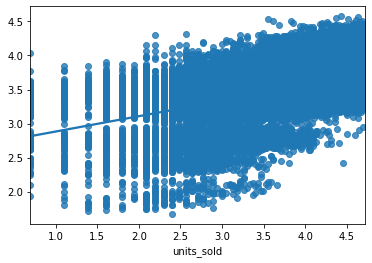

In [71]:
sns.regplot(y_test, y_pred)

In [72]:
prediction = lin_model.predict(test2)
prediction

array([ 57.9460913 ,  58.31693779,  71.29663127, ..., 211.31438282,
       100.50614986, 122.45730112])

In [73]:
test2['Predicted Sales'] = prediction

In [75]:
test2.head(10)

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,year,month,day,week_of_year,day_of_week,Predicted Sales
0,8091,216418,108.3000,108.3000,0,0,2013,7,16,29,1,57.946091
1,8091,216419,109.0125,109.0125,0,0,2013,7,16,29,1,58.316938
2,8091,216425,133.9500,133.9500,0,0,2013,7,16,29,1,71.296631
3,8091,216233,133.9500,133.9500,0,0,2013,7,16,29,1,71.297070
4,8091,217390,176.7000,176.7000,0,0,2013,7,16,29,1,93.545351
5,8091,219009,218.7375,218.7375,0,0,2013,7,16,29,1,115.421727
6,8091,219029,341.2875,341.2875,0,0,2013,7,16,29,1,179.207671
7,8091,223245,233.7000,233.7000,0,0,2013,7,16,29,1,123.199864
8,8091,223153,240.1125,240.1125,0,0,2013,7,16,29,1,126.537713
9,8095,216418,109.7250,109.7250,0,0,2013,7,16,29,1,58.687739
